In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.patches as patches
from object_loc_helper import get_class_names_map, PlotLosses, plot_sample_class

Using TensorFlow backend.


In [3]:
annotations_dict_train_all = np.load('annotations_train.npy').flat[0]
annotations_dict_val_all = np.load('annotations_val.npy').flat[0]

In [4]:
def get_selected_dict(final_selection, annotations_dict, width = 500, height = 375, depth = 3):
    selection_dict = {}
    heights = []
    for img_class in final_selection:
        selection_dict[img_class] = {}
        for k, v in annotations_dict[img_class].items():
            if len(v['bounding_boxes']) == 1 and v['width'] == width and v['depth'] == depth and v['height'] == height:
                selection_dict[img_class][k] = v
                heights.append(v['height'])
    return selection_dict

In [5]:
selected_classes = ['n04487081', 'n02108089', 'n01751748', 'n02701002', 'n02279972']

In [6]:
annotations_dict_train = get_selected_dict(selected_classes, annotations_dict_train_all)
annotations_dict_val = get_selected_dict(selected_classes, annotations_dict_val_all)

In [7]:
np.save('reduced_dataset/annotations_train_5_classes.npy', annotations_dict_train)
np.save('reduced_dataset/annotations_val_5_classes.npy', annotations_dict_val)

In [8]:
synset_dict = get_class_names_map()
# Para train
for i, (class_id, v) in enumerate(annotations_dict_train.items()):
    print(len(v.keys()), class_id, synset_dict[class_id])

435 n04487081 trolleybus, trolley coach, trackless trolley
293 n02108089 boxer
283 n01751748 sea snake
281 n02701002 ambulance
272 n02279972 monarch, monarch butterfly, milkweed butterfly, Danaus plexippus


In [9]:
data_folder = 'dataset/ILSVRC/Data/CLS-LOC'

n04487081 trolleybus, trolley coach, trackless trolley
Cantidad de imagenes de esta clase: 435


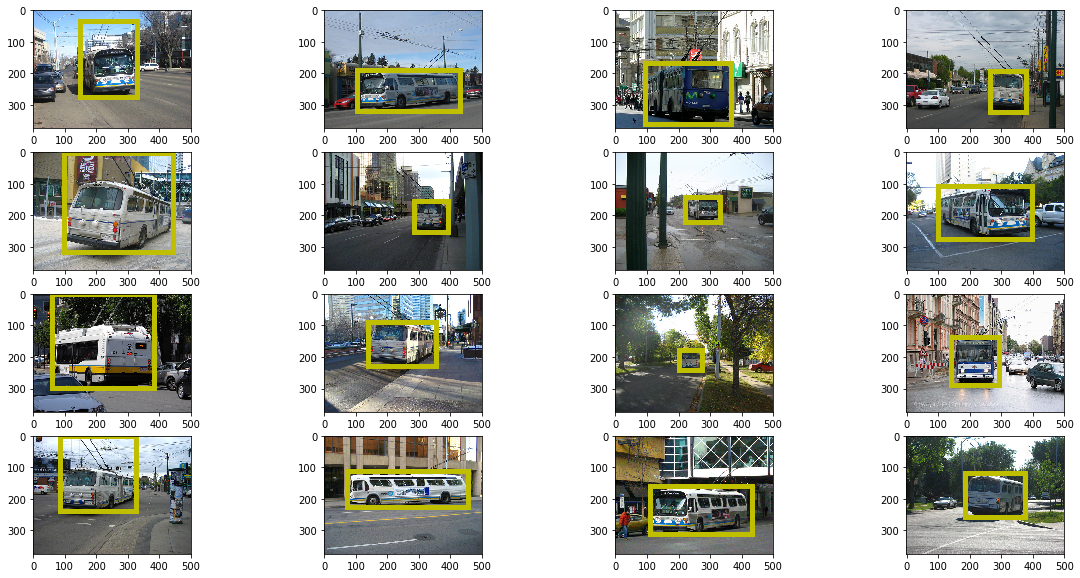

In [11]:
plot_sample_class(0, annotations_dict_train, synset_dict, data_folder)

# Armo carpentas con clases

In [12]:
import os
from shutil import copyfile, rmtree

In [13]:
train_folder = 'reduced_dataset/images/train'
val_folder = 'reduced_dataset/images/val'

In [14]:
# Creo carpetas de train y val
if (os.path.isdir(train_folder)):
    rmtree(train_folder)
os.mkdir(train_folder)
if (os.path.isdir(val_folder)):
    rmtree(val_folder)
os.mkdir(val_folder)

In [15]:
# Create classes folders
for class_id in annotations_dict_train.keys():
    folder_to_create_train = train_folder+'/'+class_id
    folder_to_create_val = val_folder+'/'+class_id
    if (os.path.isdir(folder_to_create_train)):
        rmtree(folder_to_create_train)
    if (os.path.isdir(folder_to_create_val)):
        rmtree(folder_to_create_val)
    os.mkdir(folder_to_create_train)
    os.mkdir(folder_to_create_val)

In [16]:
# Para train
class_list = []
images_file_list = []
for i, (class_id, v) in enumerate(annotations_dict_train.items()):
    for j, image_file_id in enumerate(v):
        image_file = data_folder+'/train/'+class_id+'/' +image_file_id+'.JPEG'
        copyfile(image_file, train_folder+'/'+class_id+'/' +image_file_id+'.JPEG')
    print('class index:',i, 'Total:', j+1)

class index: 0 Total: 435
class index: 1 Total: 293
class index: 2 Total: 283
class index: 3 Total: 281
class index: 4 Total: 272


In [17]:
# Para val
class_list = []
images_file_list = []
for i, (class_id, v) in enumerate(annotations_dict_val.items()):
    for j, image_file_id in enumerate(v):
        image_file = data_folder+'/val/' +image_file_id+'.JPEG'
        copyfile(image_file, val_folder+'/'+class_id+'/' +image_file_id+'.JPEG')
    print('class index:',i, 'Total:', j)

class index: 0 Total: 30
class index: 1 Total: 25
class index: 2 Total: 32
class index: 3 Total: 38
class index: 4 Total: 29
